# Cardio Zeclinics

In [32]:
#!pip install readlif

Imports

In [33]:
import sys
import numpy as np
from os import listdir
from os.path import isfile, join
import time

import matplotlib.pyplot as plt


In [34]:
def read(path):
    start=time.time()

    path_files = [f for f in listdir(path)]
    num_files=len(path_files)
    img_arrays= [None] * num_files
    for i in range(num_files):
        files = [f for f in listdir(path+"/"+path_files[i]) if isfile(join(path+"/"+path_files[i], f))]
        num_frames=len(files)
        frames_arrays= [None] * num_frames
        for j in range(num_frames):
            frames_arrays[j]=np.load(path+"/"+path_files[i]+"/"+files[j])
        img_arrays[i]=frames_arrays

    print("Elapsed time = ", time.time()-start)
    return img_arrays

In [35]:
path = 'CARDIO_videos'
frames = read(path)

Elapsed time =  0.1444103717803955


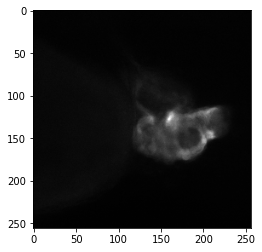

In [39]:
plt.imshow(frames[0][0],cmap='gray')

Preprocessing per centrar les imagges i passar de (482,408) a (256,256) centrantnos en el corasón

In [46]:
def find_top_corner(in_shape,out_shape,center_idx):
  # out shape = 1 number, shape of dimensions
  # in shape = array of input dimensions

  top_left = [center_idx[0] - (out_shape/2),center_idx[1]-(out_shape/2)]

  if center_idx[1]+out_shape/2 > in_shape[1]: # dreta
    diff = center_idx[1]+out_shape/2 - in_shape[1]
    top_left[1] -= diff
  if center_idx[1]-out_shape/2 < 0: # esquerra
    diff = 0 - center_idx[1]-out_shape/2
    top_left[1] += diff
  if center_idx[0]-out_shape/2 < 0: # top
    diff = 0 - center_idx[0]-out_shape/2
    top_left[0] += diff
  if center_idx[0]+out_shape/2 > in_shape[0]: # bottom
    diff = center_idx[0]+out_shape/2-in_shape[0]
    top_left[0] -= diff

  return top_left

In [47]:
img_0 = np.uint16(np.array(frames[0][0],dtype="object"))
center = np.unravel_index(np.argmax(img_0, axis=None), img_0.shape)
top_left = find_top_corner(img_0.shape,center,out_shape)

centered_frames = [center_img(tv,out_shape=256,top_left) for tv in frames[0]]



SyntaxError: positional argument follows keyword argument (<ipython-input-47-6c0a572ad5ef>, line 5)

In [14]:
frames = [None] * len(frame_list)
out_shape = 256
for i in range(0,len(frame_list)):
  center_idx = np.unravel_index(np.argmax(frame_list[i], axis=None), frame_list[i].shape)
  top_left = center_and_reshape(frame_list[i].shape,out_shape,center_idx)
  frames[i] = frame_list[i][int(top_left[0]):int(top_left[0]+out_shape),int(top_left[1]):int(top_left[1]+out_shape)]
#[a:vertical,b:408]

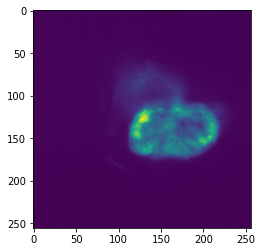

In [15]:
plt.imshow(frames[0])

In [16]:
import cv2
import glob

##Una vez tengamos lo que queremos analizar:

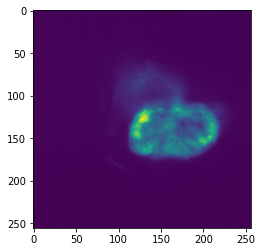

In [ ]:
from scipy import signal
from scipy import misc

#IMAGEN DE EJEMPLO
im=frames[0]
plt.imshow(im)

#DIFERENTES GRADIENT FILTERS
grad_v = np.array([[-1/8,-1/4,-1/8],[0,0,0],[1/8,1/4,1/8]])
grad_h = np.array([[-1/8,0,1/8],[-1/4,0,1/4],[-1/8,0,1/8]])
grad_full = grad_v*grad_h
grad_diag1 = np.array([[-1/4,-1/8,0],[-1/8,0,1/8],[0,1/8,1/4]])
grad_diag2 = np.array([[0,-1/8,-1/4],[1/8,0,-1/8],[1/4,1/8,0]])
grad_diagfull = grad_diag1*grad_diag2
grads = [grad_v,grad_h,grad_full,grad_diag1,grad_diag2,grad_diagfull]

#LOS HACEMOS TODOS
grad_img = []
for i in range(6):
  grad_img.append(signal.convolve2d(im, grads[i], boundary='symm', mode='same'))

In [ ]:
#FUNCION DE THRESHHOLD (si existe alguna ya en np ponedla)
def threshhold(img, thresh=2): #thold por defecto 50 pero no tiene nada que ver es para que no pete
# para los grad 1,2,4 y 5 ~ 50
# para los 3 y 6 ~
  newimg=img.copy()
  for i in range(len(img)):
    for j in range(256):
      if np.abs(img[i,j])<thresh:
        newimg[i,j] = 0
      else:
        newimg[i,j] = 1
  return newimg

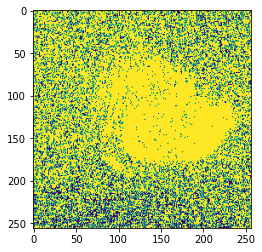

In [ ]:
aux=threshhold(grad_img[1]) #CON EL INDICE ESCOGES QUE FILTRO USAS
plt.imshow(aux)

# AUGMENTAR CONTRAST

In [ ]:
'''
plt.imshow(im)
np.argmax(im)
center_idx = np.unravel_index(np.argmax(im, axis=None), im.shape)
center_idx
im[128,197]
I = 255 * mat2gray(im)'''

'\nplt.imshow(im)\nnp.argmax(im)\ncenter_idx = np.unravel_index(np.argmax(im, axis=None), im.shape)\ncenter_idx\nim[128,197]\nI = 255 * mat2gray(im)'

PROVES GAUSSIAN FILTER

In [ ]:
from scipy import ndimage
from scipy.ndimage import gaussian_filter
import numpy as np
from scipy import signal

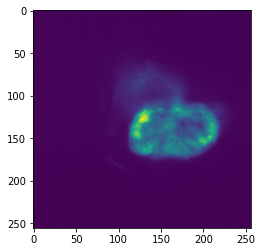

In [ ]:
im=frames[0]
plt.imshow(im)

In [ ]:
def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

def sobel_filters(img):
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    
    Ix = ndimage.filters.convolve(img, Kx)
    Iy = ndimage.filters.convolve(img, Ky)
    
    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)
    
    return (G, theta)

def non_max_suppression(img, D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi
    angle[angle < 0] += 180

    
    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255
                
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass
    
    return Z


def threshold(img, lowThresholdRatio=0.05, highThresholdRatio=0.09):
    
    highThreshold = img.max() * highThresholdRatio;
    lowThreshold = highThreshold * lowThresholdRatio;
    
    M, N = img.shape
    res = np.zeros((M,N), dtype=np.int32)
    
    weak = np.int32(25)
    strong = np.int32(255)
    
    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)
    
    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))
    
    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak
    
    return (res, weak, strong)
  
def hysteresis(img, weak, strong=255):
    M, N = img.shape  
    for i in range(1, M-1):
        for j in range(1, N-1):
            if (img[i,j] == weak):
                try:
                    if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                        or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                        or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                        img[i, j] = strong
                    else:
                        img[i, j] = 0
                except IndexError as e:
                    pass
    return img

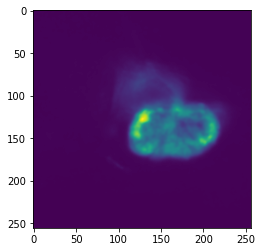

In [ ]:
#noise reduction
size = 5
blurred = signal.convolve2d(im, gaussian_kernel(size), boundary='symm', mode='same')
plt.imshow(blurred)

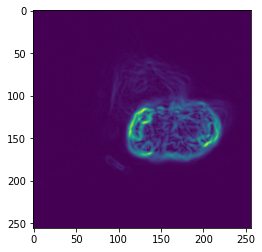

In [ ]:
#gradient calculation
(a,b) = sobel_filters(blurred)
plt.imshow(a)


#some of the edges are thick and others are thin

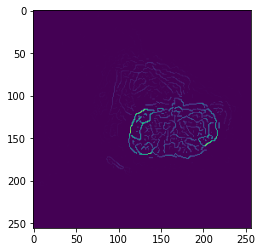

In [ ]:
#non-maximum suppression 
thin = non_max_suppression(a, b)
plt.imshow(thin)

#some pixels seem to be brighter than others

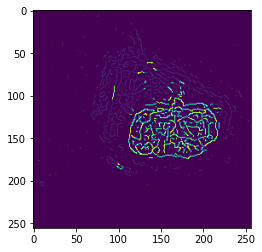

In [ ]:
#double threshold 
#   identify:
#     · Strong pixels are pixels that have an intensity so high that we are sure 
#       they contribute to the final edge.
#     · Weak pixels are pixels that have an intensity value that is not enough 
#       to be considered as strong ones, but yet not small enough to be 
#       considered as non-relevant for the edge detection.
#     · Other pixels are considered as non-relevant for the edge.

(res, weak, strong) = threshold(thin)
plt.imshow(res)

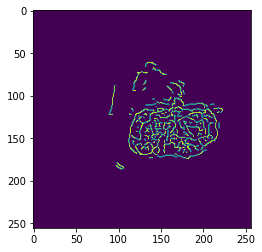

In [ ]:
#edge tracking hysteresis
#   weak pixels -> strong pixels 
#               iff
#   at least one of the pixels around the one being processed is a strong one

result =hysteresis(res, weak)
plt.imshow(result)

#PROVES AMB NN

### PROVES AMB WATERSHED


prova1


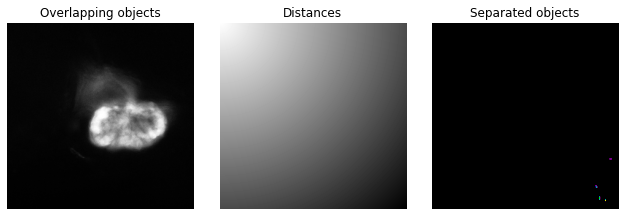

In [18]:
from scipy import ndimage as ndi

from skimage.segmentation import watershed
from skimage.feature import peak_local_max

# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
distance = ndi.distance_transform_edt(frames[0])
coords = peak_local_max(distance, footprint=np.ones((3, 3)), labels=frames[0])
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndi.label(mask)
labels = watershed(-distance, markers, mask=frames[0])

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(frames[0], cmap=plt.cm.gray)
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray)
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral)
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

prova2

## Active Contours

### Active Contours:

ventricle:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  app.launch_new_instance()


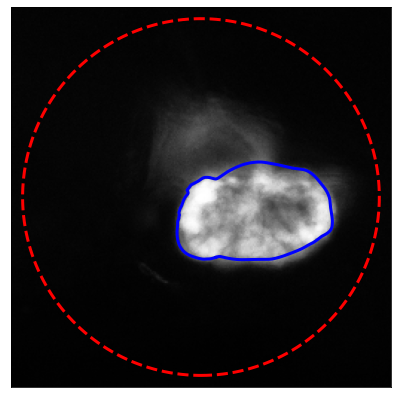

In [ ]:
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour


img = frames[0]

s = np.linspace(0, 2*np.pi, 400)
r = out_shape/2 + 120*np.sin(s)
c = out_shape/2 + 120*np.cos(s)
init = np.array([r, c]).T

# alpha = 0.05 si uint8 -> contracta mes rapid i troba el ventricle
snake = active_contour(img,
                       init, alpha=0.03, beta=0.5, gamma=0.001)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 0], init[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()

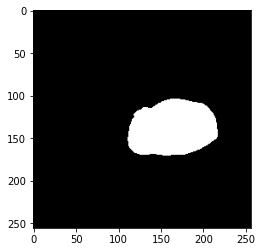

In [ ]:
# Treure la MASK a partir de SNAKE
mask0 = np.zeros((256,256))
pts = snake.astype(int)
pts2 = np.array(list(pts))
#Important to put the brackets []!!!!
mask = cv2.fillPoly(mask0 , [pts2], (255))

plt.imshow(mask, cmap='gray')

255.0

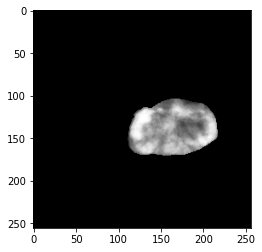

In [ ]:
plt.imshow(img*mask, cmap='gray')
a = img*mask
mask[150,150]

auricula:


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  del sys.path[0]


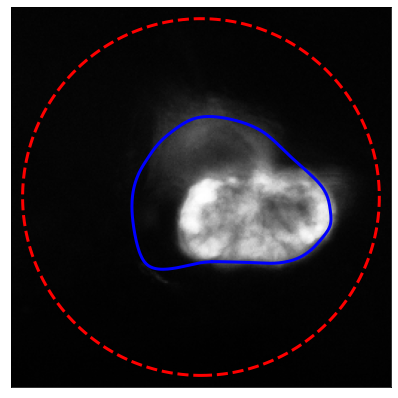

In [ ]:
from skimage.color import rgb2gray
from skimage.segmentation import active_contour


img = frames[0]

s = np.linspace(0, 2*np.pi, 400)
r = out_shape/2 + 120*np.sin(s)
c = out_shape/2 + 120*np.cos(s)
init = np.array([r, c]).T

snake = active_contour(img,
                       init, alpha=0.02, beta=2, gamma=0.001,max_iterations = 200)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 0], init[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()

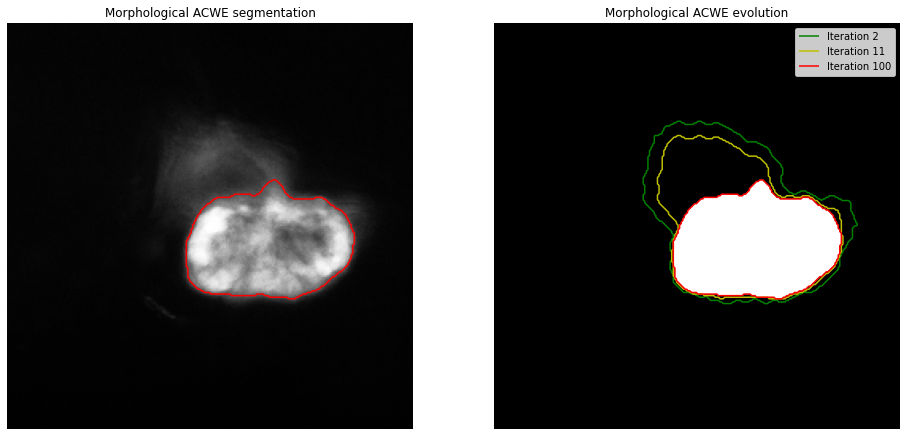

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.segmentation import (morphological_chan_vese,
                                  morphological_geodesic_active_contour,
                                  inverse_gaussian_gradient,
                                  checkerboard_level_set)


def store_evolution_in(lst):
    """Returns a callback function to store the evolution of the level sets in
    the given list.
    """

    def _store(x):
        lst.append(np.copy(x))

    return _store


# Morphological ACWE
image = frames[0]

# Initial level set
init_ls = checkerboard_level_set(image.shape, 6)
# List with intermediate results for plotting the evolution
evolution = []
callback = store_evolution_in(evolution)
ls = morphological_chan_vese(image, 100, init_level_set=init_ls, smoothing=3,
                             iter_callback=callback)

fig, axes = plt.subplots(1, 2, figsize=(16, 16))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].contour(ls, [0.5], colors='r')
ax[0].set_title("Morphological ACWE segmentation", fontsize=12)

ax[1].imshow(ls, cmap="gray")
ax[1].set_axis_off()
contour = ax[1].contour(evolution[2], [0.5], colors='g')
contour.collections[0].set_label("Iteration 2")
contour = ax[1].contour(evolution[11], [0.5], colors='y')
contour.collections[0].set_label("Iteration 11")
contour = ax[1].contour(evolution[-1], [0.5], colors='r')
contour.collections[0].set_label("Iteration 100")
ax[1].legend(loc="upper right")
title = "Morphological ACWE evolution"
ax[1].set_title(title, fontsize=12)

plt.show()

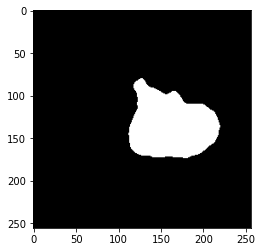

In [46]:
plt.imshow(ls)
plt.imshow(evolution[30],cmap='gray')

In [28]:
unique, counts = np.unique(ls, return_counts=True)
#dict(zip(unique, counts))
counts[1]

({0: 59609, 1: 5927}, 5927)

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Zeclinics/CARDIO/pyscripts/')

In [ ]:
import preprocess